ANALISIS CLUSTERING PROFESIONAL

1. EKSPLORASI DATA
--------------------------------------------------
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   fl

IndexError: index 2 is out of bounds for axis 0 with size 2

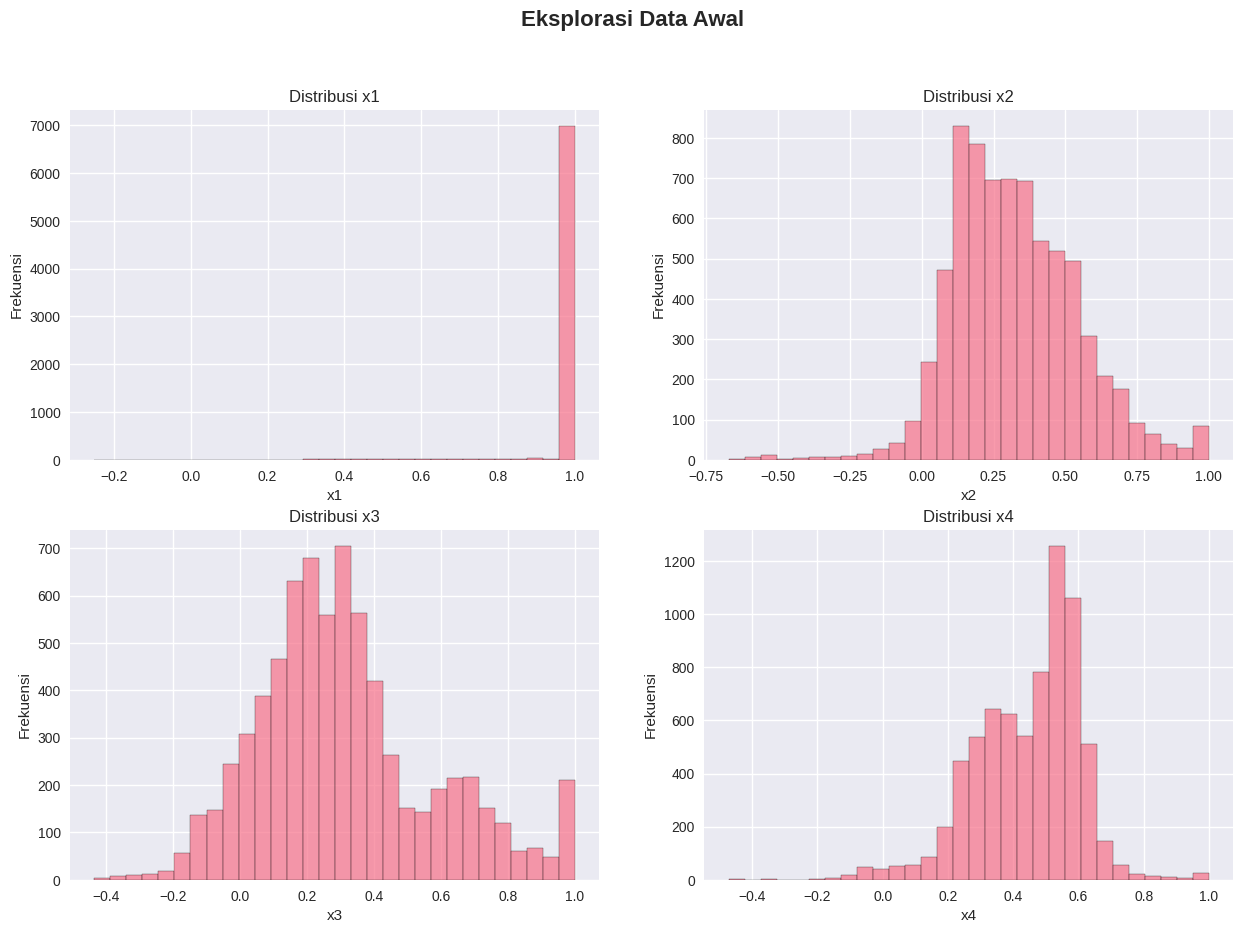

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Membaca file CSV
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv"
data = pd.read_csv(url)

print("="*80)
print("ANALISIS CLUSTERING PROFESIONAL")
print("="*80)

# 1. EKSPLORASI DATA AWAL
print("\n1. EKSPLORASI DATA")
print("-"*50)
print("Informasi dataset:")
print(data.info())
print(f"\nShape dataset: {data.shape}")
print(f"Missing values:\n{data.isnull().sum()}")
print(f"\nDeskripsi statistik:")
print(data.describe())

# Visualisasi distribusi data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Eksplorasi Data Awal', fontsize=16, fontweight='bold')

# Histogram untuk setiap fitur
for i, col in enumerate(data.columns):
    row, col_idx = i // 2, i % 2
    axes[row, col_idx].hist(data[col], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribusi {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Matriks Korelasi Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. PREPROCESSING DATA
print("\n2. PREPROCESSING DATA")
print("-"*50)

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

print("Data berhasil distandardisasi menggunakan StandardScaler")
print("Formula StandardScaler: z = (x - μ) / σ")
print("dimana:")
print("- z = nilai yang distandardisasi")
print("- x = nilai asli")
print("- μ = rata-rata")
print("- σ = standar deviasi")

print(f"\nMean setelah scaling:\n{data_scaled_df.mean()}")
print(f"\nStd setelah scaling:\n{data_scaled_df.std()}")

# visualisasi dan juga ringkasan


4. PENENTUAN JUMLAH CLUSTER OPTIMAL
--------------------------------------------------
Evaluasi untuk berbagai jumlah cluster:
K=2 - K-Means Silhouette: 0.330, Agglomerative Silhouette: 0.324
K=3 - K-Means Silhouette: 0.356, Agglomerative Silhouette: 0.349
K=4 - K-Means Silhouette: 0.359, Agglomerative Silhouette: 0.347
K=5 - K-Means Silhouette: 0.354, Agglomerative Silhouette: 0.349
K=6 - K-Means Silhouette: 0.273, Agglomerative Silhouette: 0.250
K=7 - K-Means Silhouette: 0.284, Agglomerative Silhouette: 0.261
K=8 - K-Means Silhouette: 0.292, Agglomerative Silhouette: 0.265
K=9 - K-Means Silhouette: 0.299, Agglomerative Silhouette: 0.268
K=10 - K-Means Silhouette: 0.254, Agglomerative Silhouette: 0.276


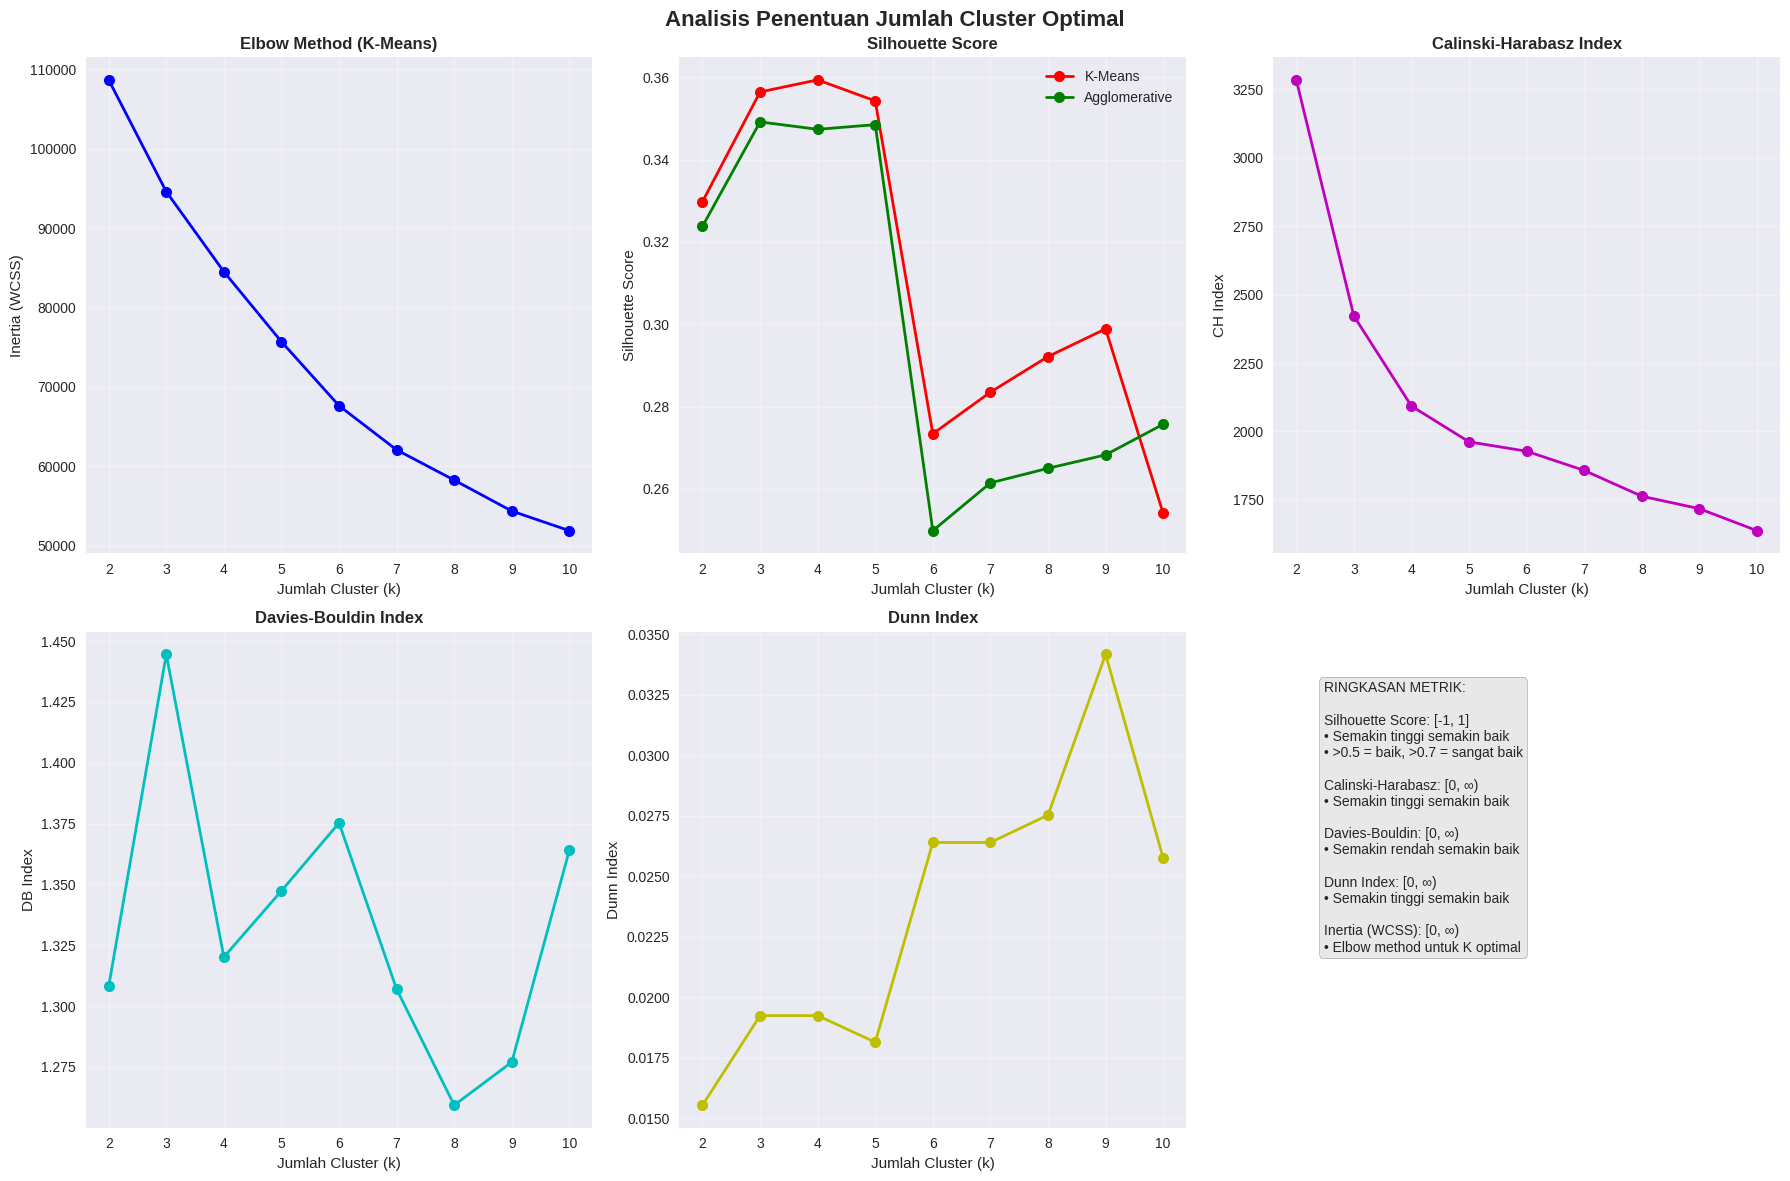

In [ ]:
# 3. FUNGSI UNTUK MENGHITUNG METRIK EVALUASI
def calculate_dunn_index(X, labels):
    """
    Menghitung Dunn Index
    Formula: DI = min(δ(Ci,Cj)) / max(Δ(Ck))
    dimana:
    - δ(Ci,Cj) = jarak minimum antar cluster
    - Δ(Ck) = jarak maksimum intra-cluster
    """
    distances = pdist(X)
    distance_matrix = squareform(distances)

    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Hitung jarak minimum antar cluster
    inter_cluster_distances = []
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            cluster_i_indices = np.where(labels == unique_labels[i])[0]
            cluster_j_indices = np.where(labels == unique_labels[j])[0]

            min_distance = np.inf
            for ci in cluster_i_indices:
                for cj in cluster_j_indices:
                    min_distance = min(min_distance, distance_matrix[ci, cj])
            inter_cluster_distances.append(min_distance)

    min_inter_cluster = min(inter_cluster_distances)

    # Hitung jarak maksimum intra-cluster
    max_intra_cluster = 0
    for i in range(n_clusters):
        cluster_indices = np.where(labels == unique_labels[i])[0]
        for ci in cluster_indices:
            for cj in cluster_indices:
                if ci != cj:
                    max_intra_cluster = max(max_intra_cluster, distance_matrix[ci, cj])

    return min_inter_cluster / max_intra_cluster if max_intra_cluster > 0 else 0

def evaluate_clustering(X, labels, algorithm_name):
    """Evaluasi clustering dengan berbagai metrik"""
    n_clusters = len(np.unique(labels))

    # Silhouette Score
    sil_score = silhouette_score(X, labels)

    # Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(X, labels)

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(X, labels)

    # Dunn Index
    dunn_score = calculate_dunn_index(X, labels)

    # Inertia (untuk K-Means)
    if algorithm_name == "K-Means":
        kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans_temp.fit(X)
        inertia = kmeans_temp.inertia_
    else:
        inertia = None

    return {
        'n_clusters': n_clusters,
        'silhouette_score': sil_score,
        'calinski_harabasz_score': ch_score,
        'davies_bouldin_score': db_score,
        'dunn_index': dunn_score,
        'inertia': inertia
    }

# 4. PENENTUAN JUMLAH CLUSTER OPTIMAL
print("\n4. PENENTUAN JUMLAH CLUSTER OPTIMAL")
print("-"*50)

# Range cluster untuk evaluasi
k_range = range(2, 11)
metrics_results = []

print("Evaluasi untuk berbagai jumlah cluster:")
for k in k_range:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    # Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_clustering.fit_predict(data_scaled)

    # Evaluasi K-Means
    kmeans_metrics = evaluate_clustering(data_scaled, kmeans_labels, "K-Means")

    # Evaluasi Agglomerative
    agg_metrics = evaluate_clustering(data_scaled, agg_labels, "Agglomerative")

    metrics_results.append({
        'k': k,
        'kmeans': kmeans_metrics,
        'agglomerative': agg_metrics
    })

    print(f"K={k} - K-Means Silhouette: {kmeans_metrics['silhouette_score']:.3f}, "
          f"Agglomerative Silhouette: {agg_metrics['silhouette_score']:.3f}")

# Visualisasi Elbow Method dan Silhouette Score
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analisis Penentuan Jumlah Cluster Optimal', fontsize=16, fontweight='bold')

# Extract data untuk plotting
k_values = [result['k'] for result in metrics_results]
kmeans_inertias = [result['kmeans']['inertia'] for result in metrics_results]
kmeans_silhouettes = [result['kmeans']['silhouette_score'] for result in metrics_results]
kmeans_ch_scores = [result['kmeans']['calinski_harabasz_score'] for result in metrics_results]
kmeans_db_scores = [result['kmeans']['davies_bouldin_score'] for result in metrics_results]
kmeans_dunn_scores = [result['kmeans']['dunn_index'] for result in metrics_results]

agg_silhouettes = [result['agglomerative']['silhouette_score'] for result in metrics_results]

# 1. Elbow Method (K-Means)
axes[0, 0].plot(k_values, kmeans_inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('Elbow Method (K-Means)', fontweight='bold')
axes[0, 0].set_xlabel('Jumlah Cluster (k)')
axes[0, 0].set_ylabel('Inertia (WCSS)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Silhouette Score Comparison
axes[0, 1].plot(k_values, kmeans_silhouettes, 'ro-', label='K-Means', linewidth=2, markersize=8)
axes[0, 1].plot(k_values, agg_silhouettes, 'go-', label='Agglomerative', linewidth=2, markersize=8)
axes[0, 1].set_title('Silhouette Score', fontweight='bold')
axes[0, 1].set_xlabel('Jumlah Cluster (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Calinski-Harabasz Index
axes[0, 2].plot(k_values, kmeans_ch_scores, 'mo-', linewidth=2, markersize=8)
axes[0, 2].set_title('Calinski-Harabasz Index', fontweight='bold')
axes[0, 2].set_xlabel('Jumlah Cluster (k)')
axes[0, 2].set_ylabel('CH Index')
axes[0, 2].grid(True, alpha=0.3)

# 4. Davies-Bouldin Index
axes[1, 0].plot(k_values, kmeans_db_scores, 'co-', linewidth=2, markersize=8)
axes[1, 0].set_title('Davies-Bouldin Index', fontweight='bold')
axes[1, 0].set_xlabel('Jumlah Cluster (k)')
axes[1, 0].set_ylabel('DB Index')
axes[1, 0].grid(True, alpha=0.3)

# 5. Dunn Index
axes[1, 1].plot(k_values, kmeans_dunn_scores, 'yo-', linewidth=2, markersize=8)
axes[1, 1].set_title('Dunn Index', fontweight='bold')
axes[1, 1].set_xlabel('Jumlah Cluster (k)')
axes[1, 1].set_ylabel('Dunn Index')
axes[1, 1].grid(True, alpha=0.3)

# 6. Summary table
axes[1, 2].axis('off')
summary_text = "RINGKASAN METRIK:\n\n"
summary_text += "Silhouette Score: [-1, 1]\n"
summary_text += "• Semakin tinggi semakin baik\n"
summary_text += "• >0.5 = baik, >0.7 = sangat baik\n\n"
summary_text += "Calinski-Harabasz: [0, ∞)\n"
summary_text += "• Semakin tinggi semakin baik\n\n"
summary_text += "Davies-Bouldin: [0, ∞)\n"
summary_text += "• Semakin rendah semakin baik\n\n"
summary_text += "Dunn Index: [0, ∞)\n"
summary_text += "• Semakin tinggi semakin baik\n\n"
summary_text += "Inertia (WCSS): [0, ∞)\n"
summary_text += "• Elbow method untuk K optimal"

axes[1, 2].text(0.1, 0.9, summary_text, transform=axes[1, 2].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

plt.tight_layout()
plt.show()